In [58]:
import random
from math import pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

In [2]:
def if_in_circle(x, y):
    return int(x**2 + y**2 <= 1)

In [3]:
def get_a_sample():
    x = random.random()
    y = random.random()
    return x, y

In [4]:
def update(count, count_in_circle):
    x, y = get_a_sample()
    count_in_circle += if_in_circle(x, y)
    count += 1
    return(count, count_in_circle)

In [5]:
def error_cal(estimate):
    return abs(estimate - pi / 4)

In [24]:
pylab.rcParams['figure.figsize'] = (12.0, 12.0)

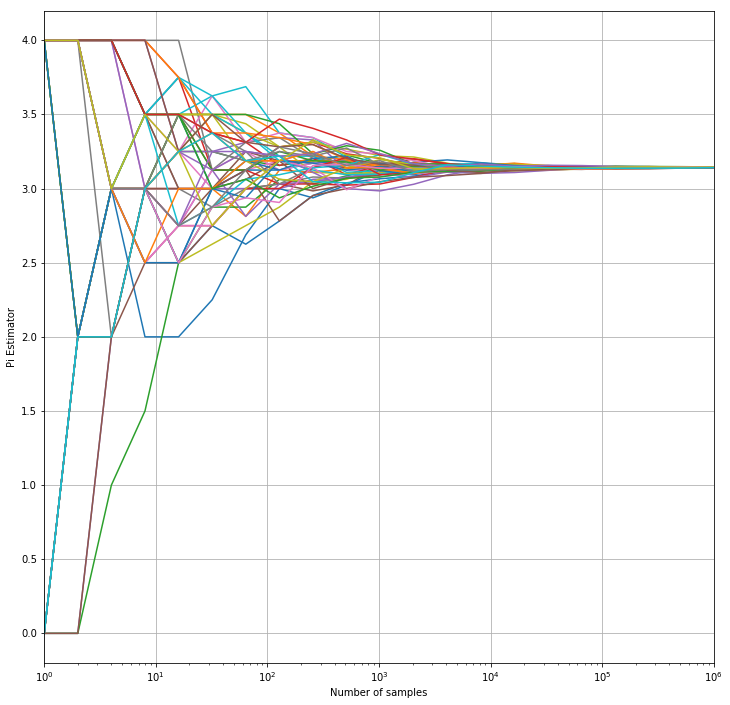

In [47]:
errors = np.zeros(100)
N = 2 ** 20
num_exp = 50
pi_exp = np.zeros((num_exp, 100))


for exp_index in range(num_exp):
    count = count_in_circle = error_index = 0
    for index in range(1, N + 1):
        count, count_in_circle = update(count, count_in_circle)
        pi_estimate = count_in_circle / count
        if index & (index - 1) == 0:
            current_error = error_cal(pi_estimate)
            errors[error_index] += current_error
            pi_exp[exp_index, error_index] = pi_estimate * 4
            error_index += 1
    plt.plot(np.logspace(start = 0, stop = 99, num = 100, base = 2), pi_exp[exp_index], '-')

plt.grid(True)
plt.xlabel('Number of samples')
plt.ylabel('Pi Estimator')
plt.xscale('log')
plt.xlim((0, 1e6))
plt.show()    

In [62]:
pd.DataFrame(list(zip(np.logspace(start = 0, stop = 99, num = 100, base = 2), stds))[:21], columns=['Number of Samples', 'Estimator Std'])

,Number of Samples,Estimator Std
0,1.0,1.795996
1,2.0,1.215895
2,4.0,0.744043
3,8.0,0.500400
4,16.0,0.442182
5,32.0,0.295762
6,64.0,0.211797
7,128.0,0.154445
8,256.0,0.113441
9,512.0,0.084079


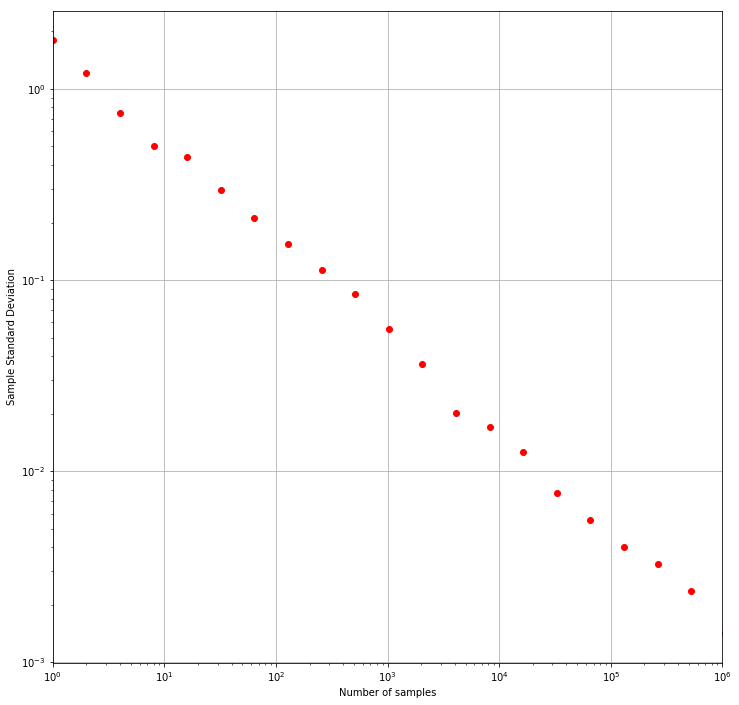

In [48]:
stds = np.std(pi_exp, axis = 0)
plt.loglog(np.logspace(start = 0, stop = 99, num = 100, base = 2), stds, 'or')
plt.grid(True)
plt.xlabel('Number of samples')
plt.ylabel('Sample Standard Deviation')
plt.xscale('log')
plt.xlim((0, 1e6))
plt.show()    

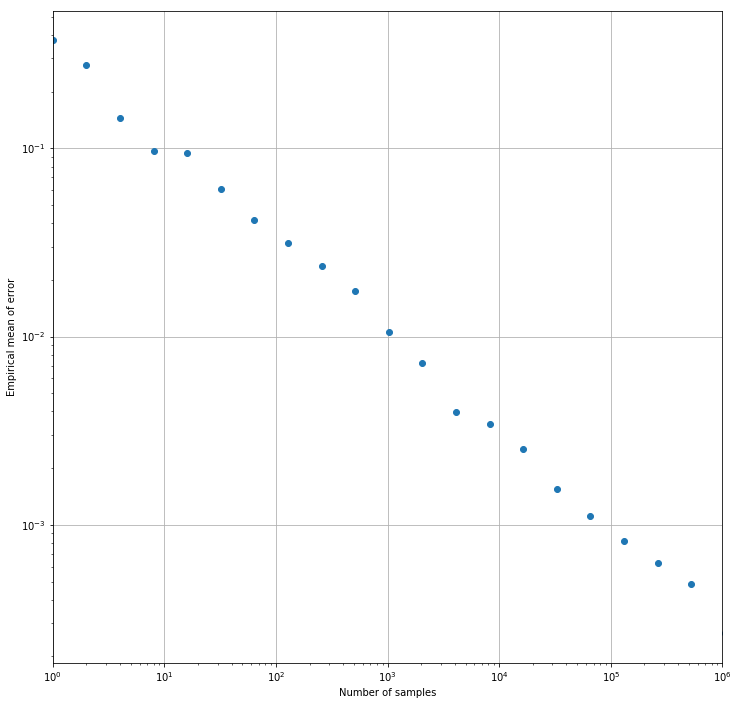

In [49]:
errors = errors / float(num_exp)
plt.loglog(np.logspace(start = 0, stop = 99, num = 100, base = 2), errors, 'o')
plt.grid(True)
plt.xlabel('Number of samples')
plt.ylabel('Empirical mean of error')
plt.xlim((0, 1e6))
plt.show()

The result is consistent with Central Limit Theorem, namely $error \sim \sqrt{N}$